Columns	Description
Pregnancies	To express the Number of pregnancies
Glucose	To express the Glucose level in blood
BloodPressure	To express the Blood pressure measurement
SkinThickness	To express the thickness of the skin
Insulin	To express the Insulin level in blood
BMI	To express the Body mass index
DiabetesPedigreeFunction	To express the Diabetes percentage
Age	To express the age
Outcome	To express the final result 1 is Yes and 0 is No

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

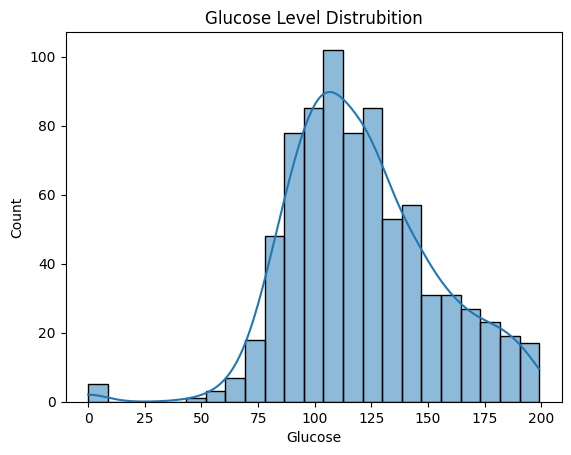

In [7]:
sns.histplot(df['Glucose'], kde= True)
plt.title('Glucose Level Distrubition')
plt.show()

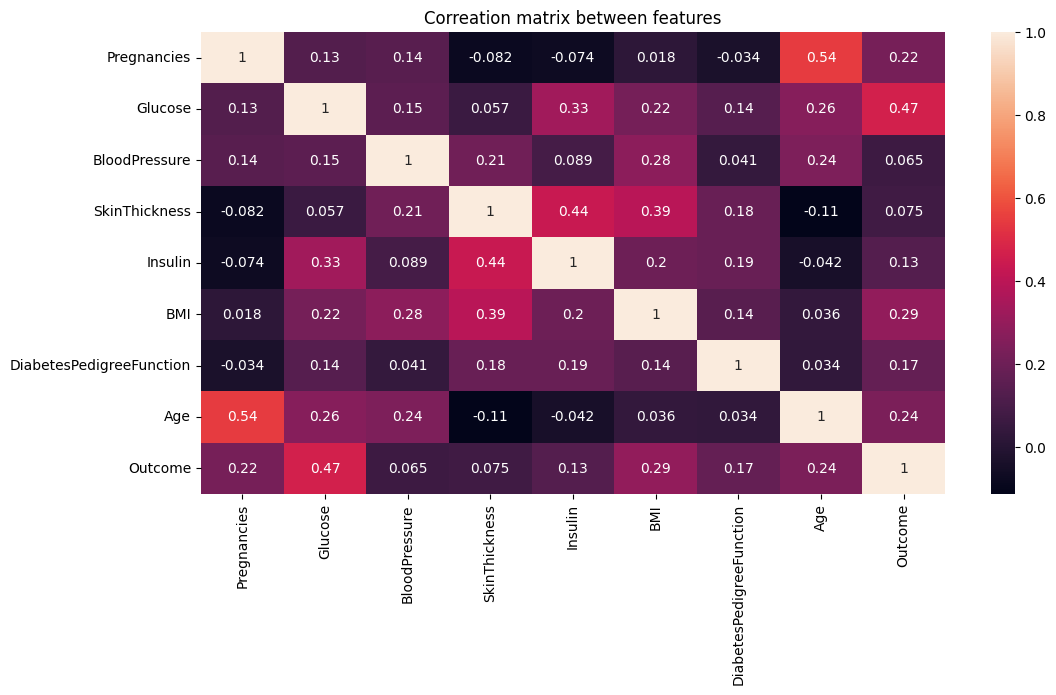

In [8]:
plt.figure(figsize = (12,6))
cm = df.corr()
sns.heatmap(cm, annot = True)
plt.title('Correation matrix between features')
plt.show()

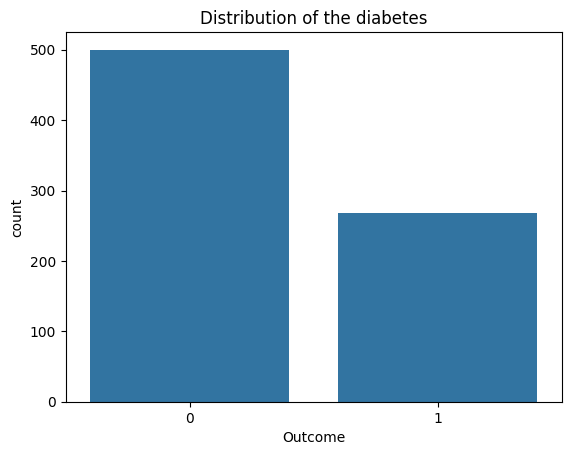

In [9]:
sns.countplot(x = 'Outcome', data =df)
plt.title('Distribution of the diabetes')
plt.show()

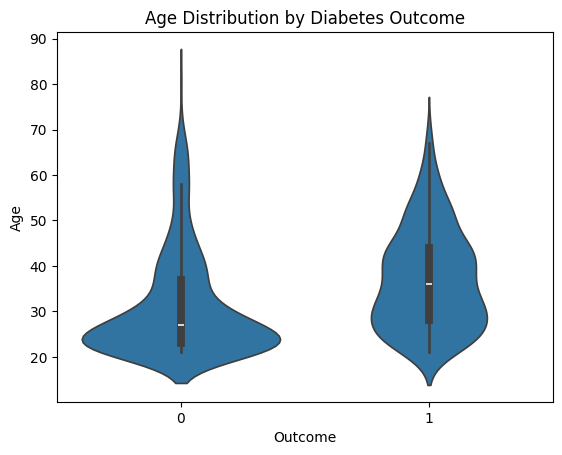

In [10]:
sns.violinplot(x='Outcome', y='Age', data=df)
plt.title('Age Distribution by Diabetes Outcome')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')

In [12]:
X = df.drop(['Outcome'], axis =1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, log_reg_pred)
conf_matrix = confusion_matrix(y_test, log_reg_pred)
classification_rep = classification_report(y_test, log_reg_pred)

print(accuracy)
print(conf_matrix)
print(classification_rep)

0.7467532467532467
[[78 21]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Train and evaluate each model
models = [logreg_model, decision_tree_model, random_forest_model, svm_model]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    model_name = model.__class__.__name__
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("="*50)

Model: LogisticRegression
Accuracy: 0.75
Confusion Matrix:
[[78 21]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Model: DecisionTreeClassifier
Accuracy: 0.75
Confusion Matrix:
[[75 24]
 [15 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Model: RandomForestClassifier
Accuracy: 0.72
Confusion Matrix:
[[77 22]
 [21 34]]
Classification Report:
              precision    recall  

In [14]:
# import optuna
# from xgboost import XGBClassifier

# def objective(trial):
#     X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
    
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
#         'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
#     }
    
#     model_xg = XGBClassifier(**params)
#     model_xg.fit(X_train, y_train)
    
#     return model_xg.score(X_valid, y_valid)
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# best_params = study.best_params
# best_score = study.best_value

# print("Best score:", best_score)
# print("Best parameters:", best_params)

In [15]:
# best_params= {'n_estimators': 983, 'max_depth': 7, 'learning_rate': 0.09661360386593308, 'subsample': 0.8107499879467862, 'colsample_bytree': 0.5683465683729872}
# best_params{'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.07140221134917633, 'subsample': 0.7268773122577521, 'colsample_bytree': 0.5390178967963822}

# model_xg = XGBClassifier(**best_params)
# model_xg.fit(X_train, y_train)

# y_pred = model_xg.predict(X_test)
# print(accuracy_score(y_test, y_pred))

In [16]:
# import pickle

# # Save the trained XGBoost model
# with open("diabetes_xgb_model.pkl", "wb") as model_file:
#     pickle.dump(model_xg, model_file)

# print("Model saved successfully as diabetes_xgb_model.pkl")

In [17]:
# import optuna
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# def objective(trial):
#     # Split Data (Assumes X, y are already preprocessed)
#     X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
#     # Define Hyperparameter Search Space
#     kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
    
#     params = {
#         'C': trial.suggest_loguniform('C', 0.01, 100),  # Regularization parameter
#         'kernel': kernel,
#     }
    
#     # Only tune gamma for RBF, Poly, and Sigmoid kernels
#     if kernel in ['rbf', 'poly', 'sigmoid']:
#         params['gamma'] = trial.suggest_loguniform('gamma', 0.0001, 1)
    
#     # Train SVM Model
#     model_svc = SVC(**params, probability=True, random_state=42)
#     model_svc.fit(X_train, y_train)
    
#     # Evaluate Model
#     y_pred = model_svc.predict(X_valid)
#     accuracy = accuracy_score(y_valid, y_pred)
    
#     return accuracy

# # Run Optuna Optimization
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# # Get Best Hyperparameters & Accuracy
# best_params = study.best_params
# best_score = study.best_value

# print("Best Score:", best_score)
# print("Best Parameters:", best_params)


In [18]:
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def objective(trial):
    # Split Data (Assumes X, y are already preprocessed)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Define Hyperparameter Search Space
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])  # Removed 'poly' & 'sigmoid' for speed

    params = {
        'C': trial.suggest_loguniform('C', 0.1, 10),  # Reduced range for faster convergence
        'kernel': kernel,
    }
    
    # Tune gamma only for RBF kernel
    if kernel == 'rbf':
        params['gamma'] = trial.suggest_loguniform('gamma', 0.001, 1)

    # Train SVM Model
    model_svc = SVC(**params, probability=True, random_state=42)
    model_svc.fit(X_train, y_train)
    
    # Evaluate Model
    y_pred = model_svc.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    
    return accuracy

# Run Optuna Optimization (Faster)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20, timeout=180, n_jobs=-1)  # Limits trials & uses all CPU cores

# Get Best Hyperparameters & Accuracy
best_params = study.best_params
best_score = study.best_value

print("✅ Best Score:", best_score)
print("✅ Best Parameters:", best_params)


[I 2025-03-02 18:57:53,925] A new study created in memory with name: no-name-8866591c-8642-4d20-99cb-f3371f671927


[I 2025-03-02 18:57:54,131] Trial 0 finished with value: 0.7142857142857143 and parameters: {'kernel': 'rbf', 'C': 0.6279236883869981, 'gamma': 0.003643037671850453}. Best is trial 0 with value: 0.7142857142857143.
[I 2025-03-02 18:57:54,141] Trial 3 finished with value: 0.7077922077922078 and parameters: {'kernel': 'rbf', 'C': 0.3939147867106774, 'gamma': 0.001709495405846841}. Best is trial 0 with value: 0.7142857142857143.
[I 2025-03-02 18:57:54,205] Trial 7 finished with value: 0.6493506493506493 and parameters: {'kernel': 'rbf', 'C': 0.12458700935744137, 'gamma': 0.010836438066892743}. Best is trial 0 with value: 0.7142857142857143.
[I 2025-03-02 18:57:54,241] Trial 1 finished with value: 0.6623376623376623 and parameters: {'kernel': 'rbf', 'C': 3.2965150727234453, 'gamma': 0.03531959916924514}. Best is trial 0 with value: 0.7142857142857143.
[I 2025-03-02 18:57:54,319] Trial 8 finished with value: 0.6558441558441559 and parameters: {'kernel': 'rbf', 'C': 0.12293229514990589, 'gam

✅ Best Score: 0.7207792207792207
✅ Best Parameters: {'kernel': 'linear', 'C': 1.199288766561841}


In [21]:
import pickle

# Train the best model using the best parameters found by Optuna
best_svc = SVC(**best_params, probability=True, random_state=42)
best_svc.fit(X, y)  # Train on the entire dataset

# Save the trained model as a pickle file
with open("diabetes_svc_model.pkl", "wb") as model_file:
    pickle.dump(best_svc, model_file)

print("✅ SVM Model saved as 'diabetes_svc_model.pkl'")


✅ SVM Model saved as 'diabetes_svc_model.pkl'
